In [1]:
#polynomial-regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# create sample data
x = np.array([1,3,5,8,11,14,17,20]).reshape(-1,1)#age
y = np.array([10,15,22,35,50,65,72,75]) # weight

#step 1 fucntion to plot any degree
def plot_polynomial(degree,color,label):
    poly = PolynomialFeatures(degree=degree,include_bias =False)
    x_poly = poly.fit_transform(x)

    #train model 
    model = LinearRegression()
    model.fit(x_poly,y)

    # predict curve
    x_smooth = np.linspace(0,25,200).reshape(-1,1)
    x_smooth_poly = poly.transform(x_smooth)
    y_smooth = model.predict(x_smooth_poly)

    plt.plot(x_smooth,y_smooth,color=color,linewidth=3,label=label)

    #print equation
    coeff = model.coef_
    intercept = model.intercept_
    print(f"\n{label} equation")
    eq = f"y = {intercept}"
    for i,c in enumerate(coeff): #enumerate function it will fix number
        eq += f"+{c:.3f}*x^{i+1}"
    print(eq)
    
    return model,poly


Linear Degree 1 equation
y = 5.55175067333591+3.792*x^1

Linear Degree 1 equation
y = 1.4443262359693279+5.068*x^1+-0.062*x^2

cubic  degree 3 equation
y = 9.182178257912753+0.555*x^1+0.479*x^2+-0.017*x^3


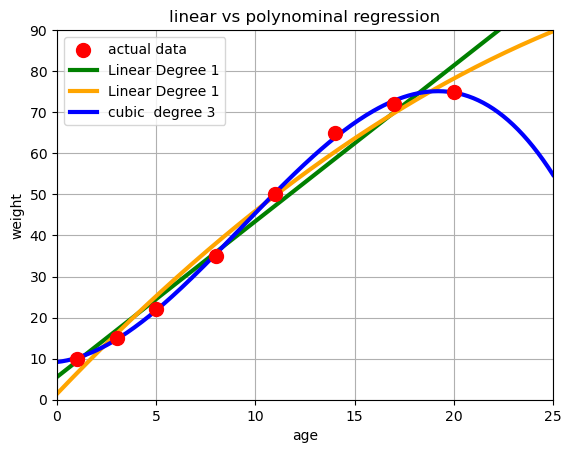

In [2]:
#plots 
plt.scatter(x,y,color='red',s=100,label='actual data',zorder=5)
plot_polynomial(1,'green','Linear Degree 1')
plot_polynomial(2,'orange','Linear Degree 1')

#ouadratic (degree 3)
modemodel_cubic,poly_cubic = plot_polynomial(3,'blue','cubic  degree 3')
plt.xlabel('age')
plt.ylabel('weight')
plt.title('linear vs polynominal regression')
plt.legend()
plt.grid()
plt.ylim(0,90)
plt.xlim(0,25)
plt.show()

In [3]:
# predict weight for age 25 using cubic model (best fit model)
age_25 = poly_cubic.transform(np.array([[25]]))
weight_25 = modemodel_cubic.predict(age_25)
print(f"\nPredicted weight for age 25 is : {weight_25[0]:.2f}")


Predicted weight for age 25 is : 54.78


In [ ]:
# regularization, ridge and laaso